<a href="https://colab.research.google.com/github/Mousavisp/DL-w-PyTorch-4-Medical-Image/blob/main/5.%20ANN%20Artificial%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

# PyTorch Gradients

In [47]:
x = torch.tensor(2.0, requires_grad=True)

In [48]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)
type(y)

tensor(63., grad_fn=<AddBackward0>)


torch.Tensor

backprop

In [49]:
y.backward()

slope of x=2, f(x)=63 is x.grad

(putting x=2 in f'(x) gives x.grad)

In [50]:
x.grad

tensor(93.)

In [51]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [52]:
y = 3*x + 2
z = 2*y**2

print(y)
print(z)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)
tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [53]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


performing back-propagation to find the gradient of x with respect to $out$

In [54]:
out.backward()

solving the derivative of $z$ with the **chain rule**: $f(g(x)) = f'(g(x))g'(x)$

In [55]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Model

In [56]:
X = torch.linspace(1,50,50).reshape(-1,1)
e = torch.randint(-7,8, X.shape, dtype=torch.float)
y = 2*X + 3 + e

We can't plot a torch datatype, so we need to change it to numpy

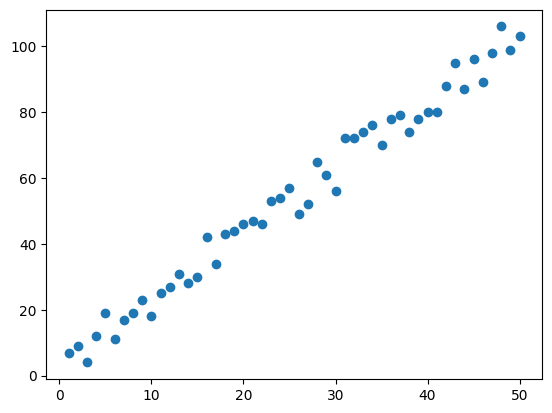

In [57]:
plt.scatter(X.numpy(), y.numpy());

In [58]:
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.2630]], requires_grad=True)
Parameter containing:
tensor([-0.7755], requires_grad=True)


In [59]:
class Model(nn.Module):

    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [60]:
model = Model(1,1)

for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.2531384229660034
linear.bias 	 -0.13421618938446045


In [61]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [62]:
epochs = 50
losses = list()

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1, loss: 2964.7216796875, weight: 0.2531384229660034, bias: -0.13421618938446045
epoch 2, loss: 1539.6646728515625, weight: 3.4337050914764404, bias: -0.03793781250715256
epoch 3, loss: 803.956787109375, weight: 1.1483283042907715, bias: -0.10406089574098587
epoch 4, loss: 424.1353759765625, weight: 2.790315628051758, bias: -0.053497519344091415
epoch 5, loss: 228.0458984375, weight: 1.6104320287704468, bias: -0.08677662163972855
epoch 6, loss: 126.810302734375, weight: 2.4581058025360107, bias: -0.05981510132551193
epoch 7, loss: 74.54454040527344, weight: 1.84894859790802, bias: -0.07613886892795563
epoch 8, loss: 47.56002426147461, weight: 2.2865469455718994, bias: -0.061362966895103455
epoch 9, loss: 33.627384185791016, weight: 1.97203528881073, bias: -0.0689341351389885
epoch 10, loss: 26.43292999267578, weight: 2.1979262828826904, bias: -0.06045006960630417
epoch 11, loss: 22.71719741821289, weight: 2.035529613494873, bias: -0.06350341439247131
epoch 12, loss: 20.7973918914

In [63]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

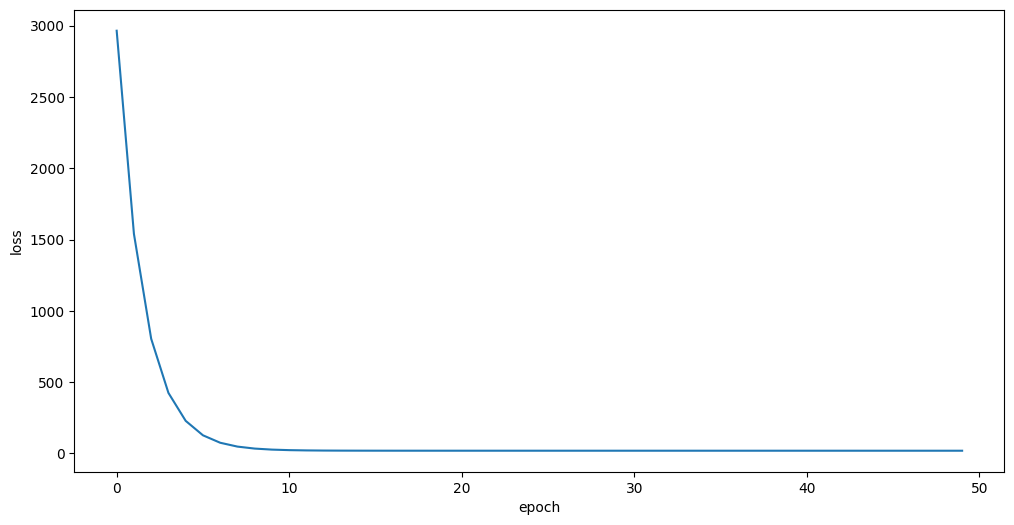

In [64]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss');

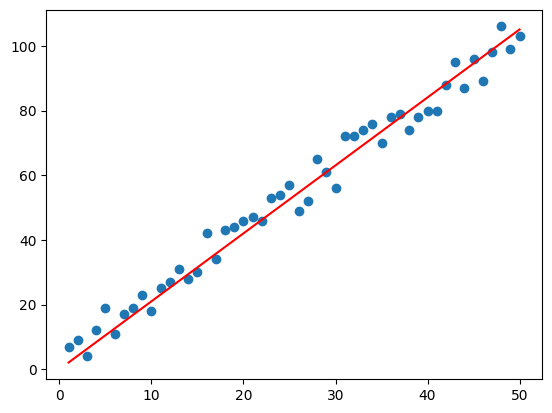

In [65]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*X + current_bias

plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), predicted_y, 'r');

# Fully Connected NN

In [66]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=10,out_features=3):

        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)


    def forward(self,x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [67]:
model = Model()

In [68]:
df = pd.read_csv('iris.csv')

In [69]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
24,4.8,3.4,1.9,0.2,0.0
96,5.7,2.9,4.2,1.3,1.0
131,7.9,3.8,6.4,2.0,2.0


In [70]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [72]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [74]:
epochs = 250
losses = list()

for i in range(epochs):
    # Forward Propagation
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    # Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.3984307050704956
Epoch: 10 Loss: 1.079959511756897
Epoch: 20 Loss: 0.992112934589386
Epoch: 30 Loss: 0.841506838798523
Epoch: 40 Loss: 0.655314564704895
Epoch: 50 Loss: 0.5012809038162231
Epoch: 60 Loss: 0.40819689631462097
Epoch: 70 Loss: 0.3120328485965729
Epoch: 80 Loss: 0.22244732081890106
Epoch: 90 Loss: 0.15340158343315125
Epoch: 100 Loss: 0.1118912324309349
Epoch: 110 Loss: 0.08853515982627869
Epoch: 120 Loss: 0.07452759146690369
Epoch: 130 Loss: 0.06600461155176163
Epoch: 140 Loss: 0.05971985682845116
Epoch: 150 Loss: 0.055029068142175674
Epoch: 160 Loss: 0.051549121737480164
Epoch: 170 Loss: 0.04872772470116615
Epoch: 180 Loss: 0.04682034254074097
Epoch: 190 Loss: 0.04527585208415985
Epoch: 200 Loss: 0.045294009149074554
Epoch: 210 Loss: 0.043013621121644974
Epoch: 220 Loss: 0.04192100837826729
Epoch: 230 Loss: 0.041015274822711945
Epoch: 240 Loss: 0.04018792882561684


In [75]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

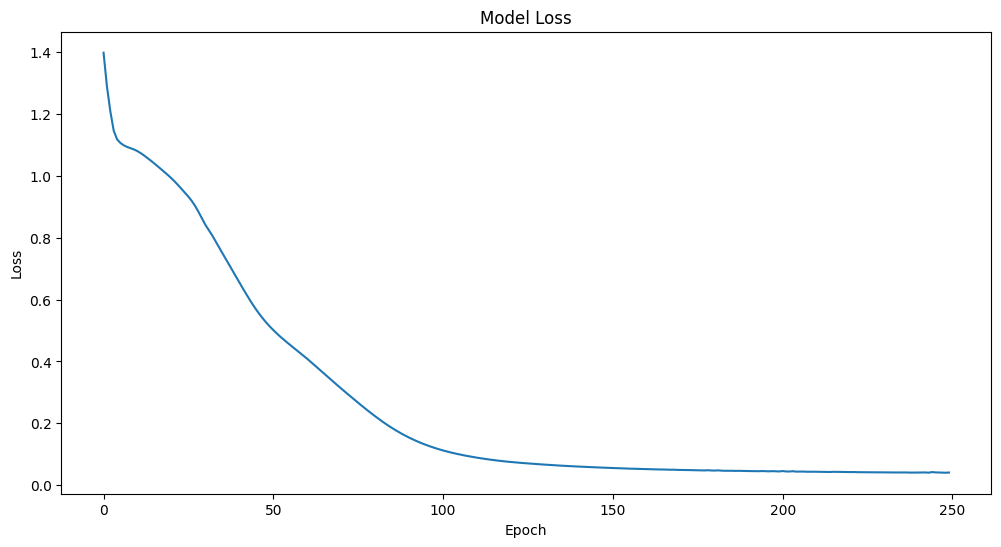

In [76]:
plt.figure(figsize=(12,6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

In [77]:
correct = 0
with torch.no_grad():
    for idx,data in enumerate(X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[idx]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


29 out of 30 = 96.67% correct


In [78]:
torch.save(model.state_dict(), 'Iris_Model.pt')

In [79]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)

# Full ANN Regression

## Feature Extraction

In [80]:
df = pd.read_csv('NYCTaxiFares.csv')

In [124]:
df.head(3)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,isweekend,hour,AM_or_PM,distance_km
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,False,4,PM,2.126312
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,True,11,AM,1.392307
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,True,7,PM,3.326763


In [125]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'isweekend', 'hour', 'AM_or_PM', 'distance_km'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   isweekend          120000 non-null  category           
 9   hour               120000 non-null  category           
 10  AM_or_PM           120000 non-null  category           
 11  distance_km        120000 non-null  float64            
dtypes: category(3), datetime64[ns,

In [84]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [98]:
df['isweekend'] = df.pickup_datetime.dt.weekday > 4

In [107]:
def haversine_distance(df, lat1, long1, lat2, long2):

    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [111]:
df['distance_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

Changing UTC time to NYC time

In [117]:
df['pickup_datetime'] = df.pickup_datetime - pd.Timedelta(hours=4)

In [120]:
df['hour'] = df.pickup_datetime.dt.hour

In [123]:
df['AM_or_PM'] = np.where(df.hour < 12, 'PM', 'AM')

In [126]:
cat_cols = ['isweekend','hour',	'AM_or_PM']
cont_cols = ['passenger_count', 'distance_km']

In [128]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [143]:
df['AM_or_PM'].cat.categories

Index(['AM', 'PM'], dtype='object')

In [144]:
df['AM_or_PM'].values

['PM', 'AM', 'PM', 'AM', 'PM', ..., 'AM', 'PM', 'AM', 'PM', 'AM']
Length: 120000
Categories (2, object): ['AM', 'PM']

In [145]:
df['AM_or_PM'].cat.codes

0         1
1         0
2         1
3         0
4         1
         ..
119995    0
119996    1
119997    0
119998    1
119999    0
Length: 120000, dtype: int8

In [146]:
df['AM_or_PM'].cat.codes.values

array([1, 0, 1, ..., 0, 1, 0], dtype=int8)

In [157]:
cats = torch.tensor(np.stack([df[col].cat.codes.values for col in cat_cols],axis=1),dtype=torch.int)

In [162]:
conts = torch.tensor(np.stack([df[col].values for col in cont_cols],axis=1),dtype=torch.float)

In [172]:
y = torch.tensor(df['fare_amount'],dtype=torch.float)

In [177]:
cat_sizes = [len(df[col].cat.categories) for col in cat_cols]
embedding_sizes = [(size,min(50,(size+1)//2)) for size in cat_sizes]
embedding_sizes

[(2, 1), (24, 12), (2, 1)]